# <center> Machine Learning </center>
# <center> How implement a simple Neural Network with Keras </center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

iris_data = load_iris()

In [ ]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
y = iris_data.target
X = iris_data.data
n_samples, n_features = X.shape
print('number of rows:',n_samples,'  number of column:', n_features)

number of rows: 150   number of column: 4


In [ ]:

X_train, X_test, y_tn, y_tt = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

### Transform the target  y (that is a categorical variable) as a dummy matrix, both for training and test

In [ ]:
y_train = to_categorical(y_tn)
y_test = to_categorical(y_tt)

In [ ]:
input = Input(shape = (4,))
x = Dense(40, activation = 'relu')(input)
x = Dense(20, activation = 'relu')(x)
x = Dense(20, activation = 'relu')(x)
output = Dense(3, activation = 'softmax')(x)
model = Model(input, output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 63        
Total params: 1,503
Trainable params: 1,503
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model fitting


In [ ]:
history = model.fit(X_train,y_train,epochs=100, validation_data = (X_test,y_test))

Epoch 1/100
4/4 [==============================] - 1s 192ms/step - loss: 1.6073 - accuracy: 0.3521 - val_loss: 1.4596 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 1.4011 - accuracy: 0.3438 - val_loss: 1.2822 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 1.2597 - accuracy: 0.3281 - val_loss: 1.1808 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 1.1595 - accuracy: 0.3438 - val_loss: 1.1297 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 1.1233 - accuracy: 0.3385 - val_loss: 1.0900 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0794 - accuracy: 0.3326 - val_loss: 1.0559 - val_accuracy: 0.5778
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0398 - accuracy: 0.6400 - val_loss: 1.0284 - val_accuracy: 0.6222
Epoch 8/100
4/4 [==

### history of fitting

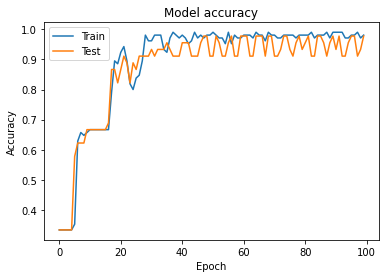

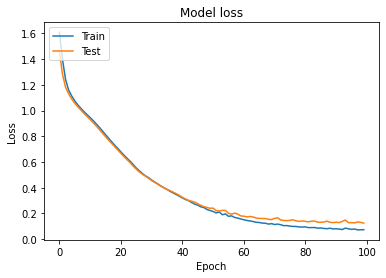

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()